In [48]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Total 39 line(s) found on the image


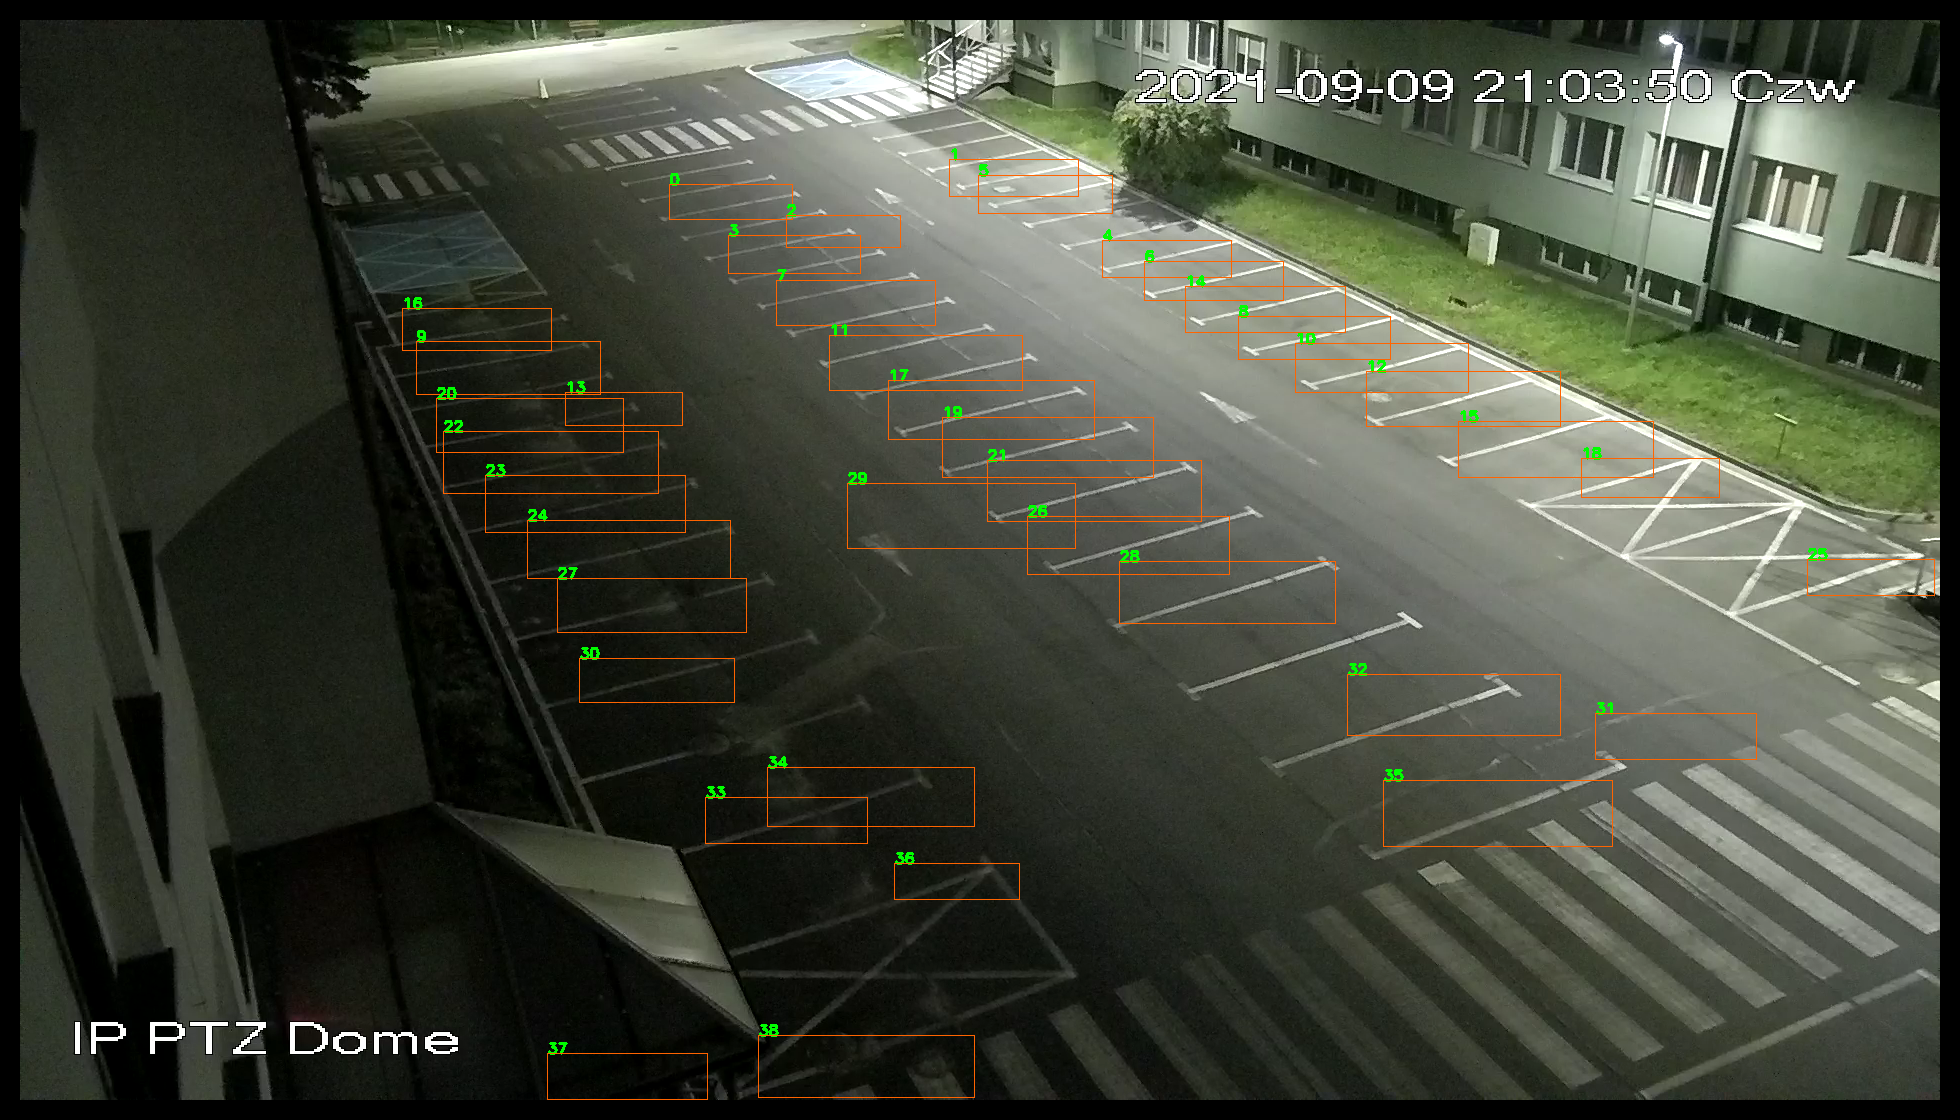

In [113]:
# load the image and convert it to grayscale
image = cv2.imread('/content/file.bmp')
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# load the line detector and detect lines in the image
lineDetector = cv2.CascadeClassifier('/content/cascade.xml') # link do xml'a

# Use the below code, if you are using OpenCv 3.0+
lineRegions = lineDetector.detectMultiScale(grayImage, scaleFactor=1.03, minNeighbors=13, minSize=(105, 27), maxSize=(250, 80), flags=cv2.CASCADE_SCALE_IMAGE)

print(f"Total {len(lineRegions)} line(s) found on the image")

# Now we loop over the lines and draw a rectangle 
# around each of the image face which we found.
for i, (x, y, w, h) in enumerate(lineRegions):
  cv2.putText(image, str(i), (x, y), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=.5, color=(0, 255, 0), thickness=2)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 100, 255), 1)

# show the detected lines on screen
cv2_imshow(image)

Index: 0; percentage: 0.12636


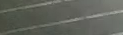

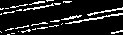

------------------------------
Index: 1; percentage: 0.1938


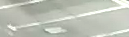

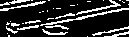

------------------------------
Index: 2; percentage: 0.09649


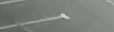

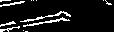

------------------------------
Index: 3; percentage: 0.12759


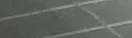

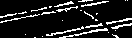

------------------------------
Index: 4; percentage: 0.13744


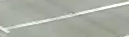

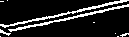

------------------------------
Index: 5; percentage: 0.18068


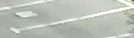

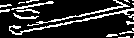

------------------------------
Index: 6; percentage: 0.1354


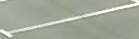

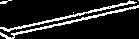

------------------------------
Index: 7; percentage: 0.1195


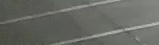

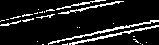

------------------------------
Index: 8; percentage: 0.11827


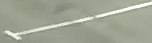

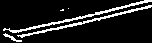

------------------------------
Index: 9; percentage: 0.05394


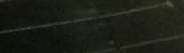

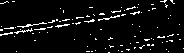

------------------------------
Index: 10; percentage: 0.11053


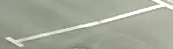

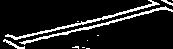

------------------------------
Index: 11; percentage: 0.11427


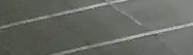

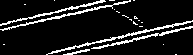

------------------------------
Index: 12; percentage: 0.12849


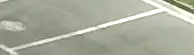

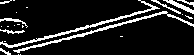

------------------------------
Index: 13; percentage: 0.02124


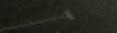

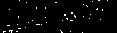

------------------------------
Index: 14; percentage: 0.12092


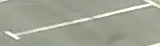

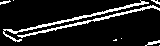

------------------------------
Index: 15; percentage: 0.09432


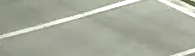

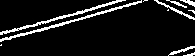

------------------------------
Index: 16; percentage: 0.06488


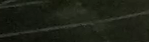

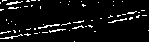

------------------------------
Index: 17; percentage: 0.09906


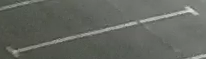

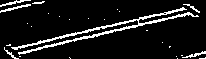

------------------------------
Index: 18; percentage: 0.16871


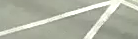

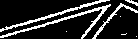

------------------------------
Index: 19; percentage: 0.08855


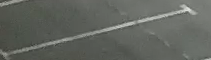

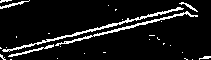

------------------------------
Index: 20; percentage: 0.03714


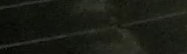

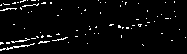

------------------------------
Index: 21; percentage: 0.08863


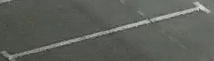

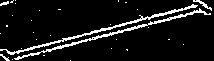

------------------------------
Index: 22; percentage: 0.03706


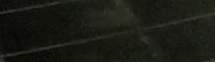

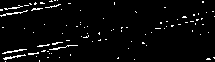

------------------------------
Index: 23; percentage: 0.03649


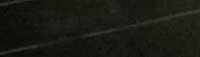

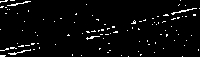

------------------------------
Index: 24; percentage: 0.03856


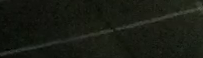

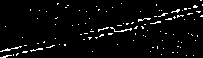

------------------------------
Index: 25; percentage: 0.22835


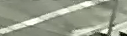

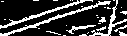

------------------------------
Index: 26; percentage: 0.08023


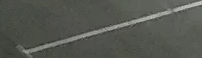

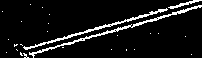

------------------------------
Index: 27; percentage: 0.02979


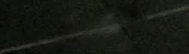

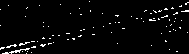

------------------------------
Index: 28; percentage: 0.08087


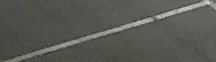

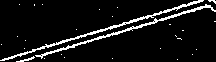

------------------------------
Index: 29; percentage: 0.03677


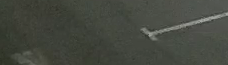

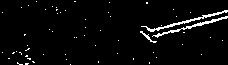

------------------------------
Index: 30; percentage: 0.04062


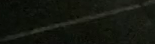

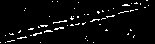

------------------------------
Index: 31; percentage: 0.02255


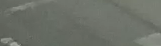

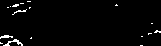

------------------------------
Index: 32; percentage: 0.07496


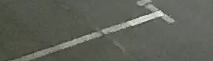

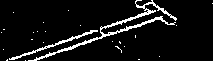

------------------------------
Index: 33; percentage: 0.02751


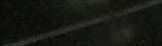

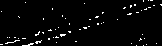

------------------------------
Index: 34; percentage: 0.02129


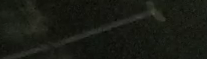

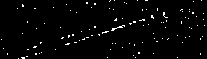

------------------------------
Index: 35; percentage: 0.08529


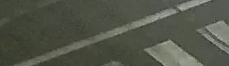

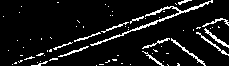

------------------------------
Index: 36; percentage: 0.03844


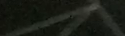

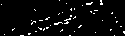

------------------------------
Index: 37; percentage: 0.01236


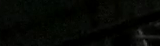

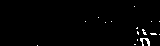

------------------------------
Index: 38; percentage: 0.03808


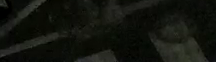

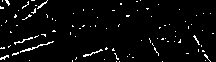

------------------------------


In [161]:
# https://www.pyimagesearch.com/2021/05/12/adaptive-thresholding-with-opencv-cv2-adaptivethreshold/

image = cv2.imread('/content/file.bmp')
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

lineDetector = cv2.CascadeClassifier('/content/cascade.xml') # link do xml'a

lineRegions = lineDetector.detectMultiScale(grayImage, scaleFactor=1.03, minNeighbors=13, minSize=(105, 27), maxSize=(250, 80), flags=cv2.CASCADE_SCALE_IMAGE)

for idx, (x, y, w, h) in enumerate(lineRegions):
  gray = grayImage[y:y+h, x:x+w]
  adaptiveThreshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 7, 7)
  unique, counts = np.unique(adaptiveThreshold, return_counts=True)
  dictOfUniqueElements = dict(zip(unique, counts))

  print(f'Index: {idx}; percentage: {round(dictOfUniqueElements[255] / (dictOfUniqueElements[0] + dictOfUniqueElements[255]), 5)}')
  cv2_imshow(image[y:y+h, x:x+w])
  print('\n')
  cv2_imshow(adaptiveThreshold)
  print('-'*30)
